In [1]:
import joblib
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [2]:
# Setting the variables
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
loaded_rf = loaded_joblib['RandomForest']

In [3]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [4]:
# Creating the X_shap values
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
y_shap = y_train.loc[X_shap.index]
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3888,15.85,0.110653,36.9506,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2497,15.10,0.087407,221.8456,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7723,17.50,0.015592,184.8266,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8117,10.80,0.049820,243.2144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7475,15.00,0.044999,140.4838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [5]:
# Instantiate a Model Explainer with the model
explainer = shap.Explainer(loaded_rf)

## Get shap values from the explainer
shap_values = explainer(X_shap,y_shap)

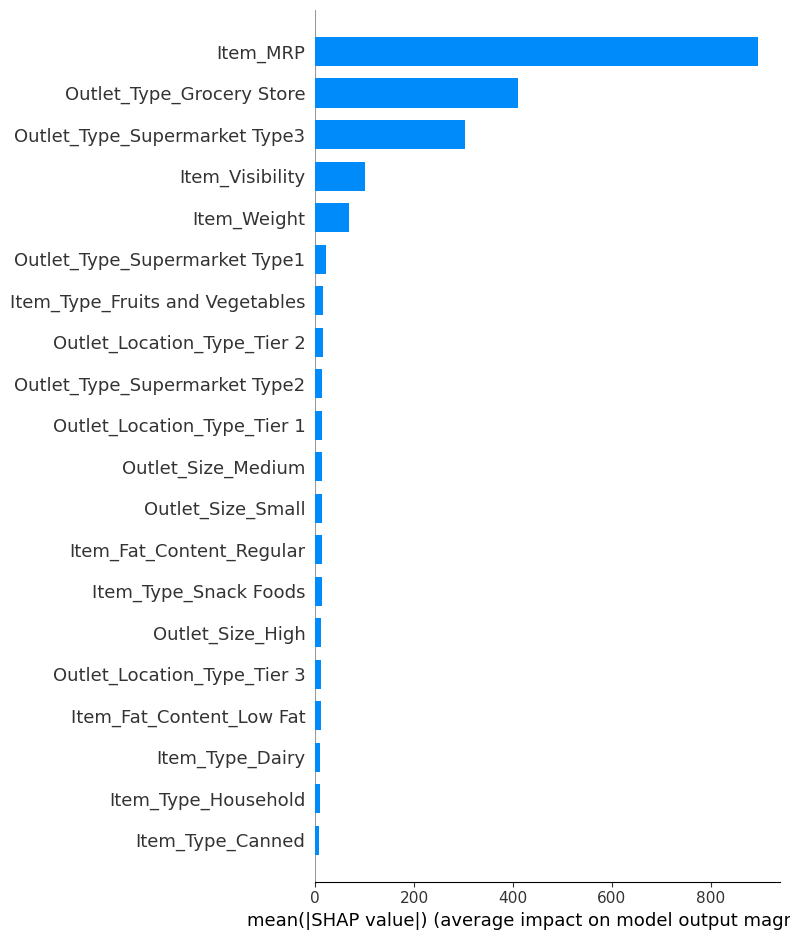

In [6]:
# Plotting a summary bar plot
shap.summary_plot(shap_values, features= X_train_df, plot_type='bar')

![feature importance graph](https://github.com/BrazilianKing/Project-1-Revisited/assets/123523010/0886b402-de5e-4a03-b4a7-15e7868b12dc)


- Both graphs have the same top 5 features but Item_visibility and Outlet_Type_Supermarket_Type3 or in difference positions

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


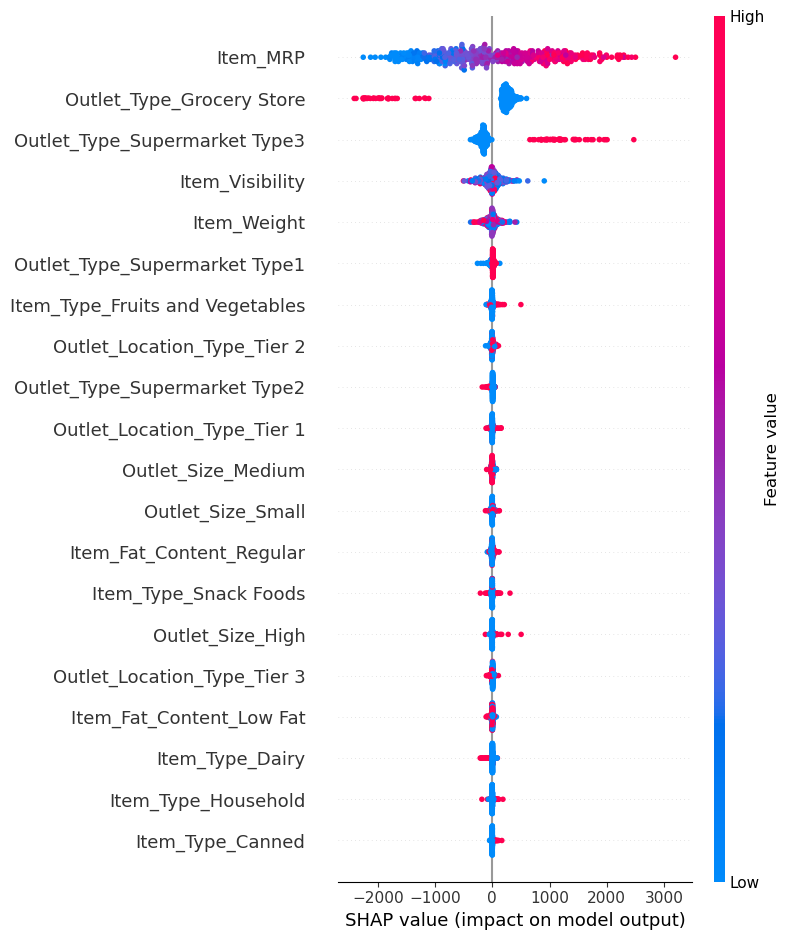

In [7]:
# Plotting a summary dot plot
shap.summary_plot(shap_values, X_shap)

## 3 Most Important Features

- Item MRP


- Outlet_Type_Grocery Store


- Outlet_Type_Supermarket_Type3

# Local Explanations

In [8]:
# Reseting the index

X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)
X_shap_local.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,15.85,0.110653,36.9506,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,15.10,0.087407,221.8456,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,17.50,0.015592,184.8266,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,10.80,0.049820,243.2144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,15.00,0.044999,140.4838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [9]:
# Reviewing Item MRP

X_shap_local['Item_MRP'].describe()

count    400.000000
mean     146.899303
std       64.290200
min       32.055800
25%       98.821300
50%      144.028600
75%      195.711000
max      265.222600
Name: Item_MRP, dtype: float64

In [10]:
## saving the index of the highest MRP
idx_high_mrp = X_shap_local['Item_MRP'].idxmax()
idx_high_mrp

171

In [11]:
# checking the feature values for selected example
X_shap_local.iloc[idx_high_mrp]

Item_Weight                         10.00000
Item_Visibility                      0.02588
Item_MRP                           265.22260
Item_Fat_Content_LF                  0.00000
Item_Fat_Content_Low Fat             1.00000
Item_Fat_Content_Regular             0.00000
Item_Fat_Content_low fat             0.00000
Item_Fat_Content_reg                 0.00000
Item_Type_Baking Goods               0.00000
Item_Type_Breads                     0.00000
Item_Type_Breakfast                  0.00000
Item_Type_Canned                     1.00000
Item_Type_Dairy                      0.00000
Item_Type_Frozen Foods               0.00000
Item_Type_Fruits and Vegetables      0.00000
Item_Type_Hard Drinks                0.00000
Item_Type_Health and Hygiene         0.00000
Item_Type_Household                  0.00000
Item_Type_Meat                       0.00000
Item_Type_Others                     0.00000
Item_Type_Seafood                    0.00000
Item_Type_Snack Foods                0.00000
Item_Type_

In [12]:
## what was the actual mrp?
y_shap_local.iloc[idx_high_mrp]

5815.0972

# Shap Force Plots

## Linear Reg explanation

In [13]:
#Import
from sklearn.linear_model import LinearRegression

In [14]:
## plotting example force plot for most inf.deaths (from rf)

shap.force_plot(explainer.expected_value, 
                shap_values=shap_values[idx_high_mrp].values,
               features=X_shap_local.iloc[idx_high_mrp])

## LIME

In [15]:
from lime.lime_tabular import LimeTabularExplainer

## Create a lime explainer with X_shap_local with regression as the mode
lime_explainer =LimeTabularExplainer(
    training_data=X_shap_local.values,  
    feature_names=X_shap_local.columns,
   mode='regression'
)
lime_explainer

In [16]:
## Use the lime explainer to explain the selected example used above 
exp = lime_explainer.explain_instance(X_shap_local.loc[idx_high_mrp],
                                      loaded_rf.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [17]:
def get_permutation_importance(loaded_rf,X_test_df,y_test, scoring='r2',
                               n_repeats=3, n_jobs=-1,random_state=321):

    result = permutation_importance(loaded_rf, X_test_df, y_test,scoring=scoring, 
                                    n_repeats=n_repeats, n_jobs=n_jobs,
                                    random_state=random_state)
    perm_importances = pd.Series(result['importances_mean'], index=loaded_rf.feature_names_in_)
    return perm_importances

In [18]:
shap.force_plot(explainer.expected_value,shap_values.values,X_shap_local)